# Datasets - HuggingFace

In [ ]:
# %%capture
# !pip install datasets

# from datasets import list_datasets
# print(list_datasets())

# %%capture
# from datasets import load_dataset
# flower = load_dataset("huggan/flowers-102-categories")#, split="train[:10]")

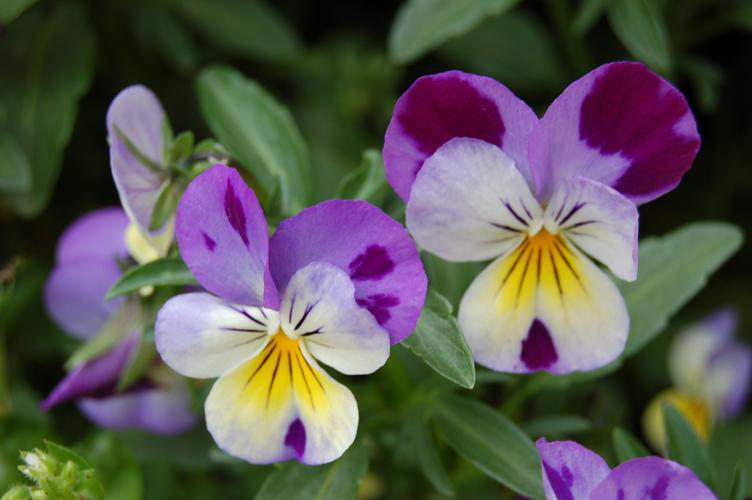

In [ ]:
# flower['train']['image'][0]

In [ ]:
# flower

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 8189
    })
})

In [ ]:
# flower = flower.train_test_split(test_size=0.2)

In [ ]:
# flower["image"]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=752x500 at 0x7FBF6056BD90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=774x500 at 0x7FBF6C501B80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=743x500 at 0x7FBF60926DF0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=666x500 at 0x7FBF6056B4C0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=666x500 at 0x7FBF6056BFD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x845 at 0x7FBF6056B400>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x665 at 0x7FBF6056BDF0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=782x500 at 0x7FBF6056BB20>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=667x500 at 0x7FBF6056B1C0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=667x500 at 0x7FBF6056B070>]

In [ ]:
import numpy as np
np.asarray(flower['train']['image'][0]).shape
# (H,W,C)

(500, 752, 3)

In [ ]:
# def transforms(examples):
#      examples["pixel_values"] = [_transforms(img.convert("RGB")) for img in examples["image"]]
#      del examples["image"]
#      return examples

In [ ]:
# img = torch.vstack([_transforms(img.convert("RGB")) for img in flower['image']])
# img.shape

torch.Size([10, 3, 224, 224])

In [ ]:
# data_collator = transformers.DefaultDataCollator()

In [ ]:
# img = next(iter(flower))['pixel_values']

# Dataset Flowers102

In [1]:
%%capture
!pip install transformers

In [11]:
'''Imports'''

import torch
import transformers

import torchvision
import torchvision.transforms as t
from torch.utils.data import DataLoader

# others
from tqdm import tqdm

### Process image data

In [35]:
# get image configs for CLIP
deets = transformers.CLIPImageProcessor()

# can also pass PIL images / arrays to  deets (CLIPImageProcessor)
_transforms = t.Compose([
                          t.Resize((deets.crop_size['height'],deets.crop_size['width'])),   #(224,224)
                          t.ToTensor(), 
                          t.Normalize(mean=deets.image_mean, std=deets.image_mean),
                          ])

flower = torchvision.datasets.Flowers102(root='/content/',transform=_transforms,download=True,split='train')
print(flower)

train_dataloader = DataLoader(flower, batch_size=32, shuffle=False)

  0%|          | 0/344862509 [00:00<?, ?it/s]

Extracting /content/flowers-102/102flowers.tgz to /content/flowers-102


  0%|          | 0/502 [00:00<?, ?it/s]

  0%|          | 0/14989 [00:00<?, ?it/s]

Dataset Flowers102
    Number of datapoints: 1020
    Root location: /content/
    split=train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.48145466, 0.4578275, 0.40821073])
           )


In [ ]:
flower[0]

(tensor([[[-0.9185, -0.9104, -0.8697,  ...,  0.0752,  0.1729,  0.1648],
          [-0.8941, -0.8941, -0.8534,  ...,  0.0915,  0.1729,  0.1648],
          [-0.8615, -0.8697, -0.8615,  ...,  0.1159,  0.1729,  0.1729],
          ...,
          [-0.7475, -0.7475, -0.7638,  ..., -0.0144, -0.0144, -0.0307],
          [-0.7964, -0.7638, -0.7556,  ..., -0.0226, -0.0226, -0.0307],
          [-0.8045, -0.7964, -0.7556,  ..., -0.0144, -0.0307, -0.0389]],
 
         [[-0.8201, -0.8030, -0.7430,  ..., -0.1777, -0.1092, -0.1520],
          [-0.8116, -0.7944, -0.7345,  ..., -0.1691, -0.1177, -0.1520],
          [-0.8030, -0.7944, -0.7602,  ..., -0.1520, -0.1349, -0.1520],
          ...,
          [-0.5203, -0.5289, -0.5632,  ..., -0.1349, -0.1349, -0.1520],
          [-0.5546, -0.5289, -0.5203,  ..., -0.1263, -0.1520, -0.1863],
          [-0.5632, -0.5546, -0.5118,  ..., -0.1092, -0.1606, -0.2034]],
 
         [[-0.9231, -0.9328, -0.9231,  ...,  0.3353,  0.5083,  0.4314],
          [-0.9039, -0.9231,

## Models - CLIP Vision 

Get image Embeddings 

In [ ]:
version = "openai/clip-vit-base-patch32"
# %%capture
# Initializing a CLIPVisionConfig with openai/clip-vit-base-patch32 style configuration
configuration = transformers.CLIPVisionConfig()

# Initializing a CLIPVisionModel (with random weights) from the openai/clip-vit-base-patch32 style configuration
model = transformers.CLIPVisionModel(configuration).from_pretrained(version).eval()

# Accessing the model configuration
configuration = model.config

In [ ]:
# # image shape
# batch = next(iter(train_dataloader))

# batch[0][0].shape

In [ ]:
# cpu / cuda

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
print(device)

In [ ]:
'''
last_hidden_state 
  (torch.FloatTensor of shape (batch_size, sequence_length, hidden_size)) – 
  Sequence of hidden-states at the output of the last layer of the model.

pooler_output 
  (torch.FloatTensor of shape (batch_size, hidden_size)) – 
  Last layer hidden-state of the first token of the sequence (classification token) further processed by a Linear layer 
  and a Tanh activation function. The Linear layer weights are trained from the next sentence prediction (classification) 
  objective during pretraining
'''

output = model.forward(batch[0].to(device),return_dict=False)

output[0].shape , output[1].shape ##sequence, hidden

(torch.Size([4, 50, 768]), torch.Size([4, 768]))

In [ ]:
image_embeddings = []
labels = []

for idx, (img,label) in enumerate(tqdm(train_dataloader)):
  if idx<30:
    continue
  else:
    output = model.forward(img.to(device),return_dict=False)
    image_embeddings.append(output[1])
    labels.append(label)

100%|██████████| 32/32 [00:21<00:00,  1.48it/s]


In [ ]:
torch.vstack(image_embeddings).shape, torch.hstack(labels).shape

(torch.Size([60, 768]), torch.Size([60]))

In [ ]:
torch.save(torch.vstack(image_embeddings), 'flower_image_emb_3.pt')
torch.save(torch.hstack(labels), 'flower_labels_3.pt')

In [ ]:
'''Done to avoid Colab Pro (for now!!!) '''
image_embeddings = torch.vstack((torch.load('flower_image_emb_0.pt'),
              torch.load('flower_image_emb_0.5.pt'),
              torch.load('flower_image_emb_1.pt'),
              torch.load('flower_image_emb_2.pt'),
              torch.load('flower_image_emb_3.pt')
              ))
image_embeddings.shape

'Done to avoid Colab Pro (for now!!!) '

In [4]:
# torch.save(image_embeddings,'flower_image_emb_1020.pt')
image_embeddings = torch.load('flower_image_emb_1020.pt')

# torch.save(labels,'flower_labels_1020.pt')
labels = torch.load('flower_labels_1020.pt')

print(image_embeddings.shape, labels.shape)

torch.unique(labels,return_counts=True)

torch.Size([1020, 768]) torch.Size([1020])


(tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101]),
 tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
         10

## Mapping

In [18]:
# mapping from class int to class name (obtained from Udacity Pytorch) (Link: https://github.com/intsco/udacity-fb-pytorch-project)
cat_to_name = {"21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster", 
               "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy", 
               "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly", 
               "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist", 
               "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower", 
               "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation", 
               "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone", 
               "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow", 
               "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid", 
               "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia", 
               "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura", "40": "lenten rose", 
               "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium", "36": "ruby-lipped cattleya", 
               "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily", "18": "peruvian lily", "98": "mexican petunia", 
               "8": "bird of paradise", "30": "sweet william", "17": "purple coneflower", "52": "wild pansy", "84": "columbine", 
               "12": "colt's foot", "11": "snapdragon", "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", 
               "53": "primula", "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower", 
               "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple", 
               "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus", "88": "cyclamen", 
               "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily", "46": "wallflower", 
               "77": "passion flower", "51": "petunia"}



In [19]:
import json

with open("flowers102_cat_to_name.txt", "w") as outfile:
    json.dump(cat_to_name, outfile)

outfile.close()

In [3]:
# list(cat_to_name.keys())

## Process Text Data

In [2]:
import json
with open("flowers102_cat_to_name.txt",'r') as f:
    mapping = json.load(f)
  
mapping = {int(k)-1:str(v) for k,v in mapping.items()}

0 pink primrose


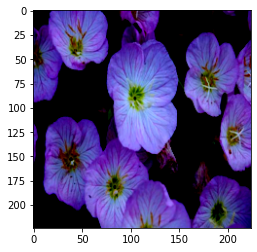

1 hard-leaved pocket orchid


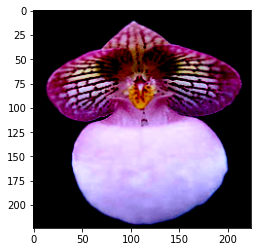

2 canterbury bells


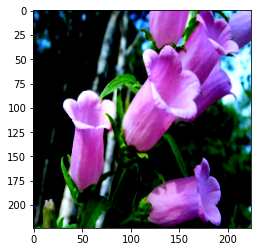

3 sweet pea


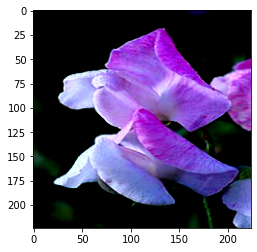

4 english marigold


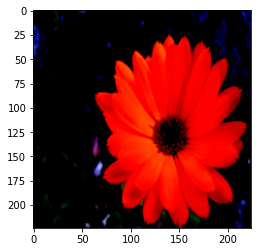

5 tiger lily


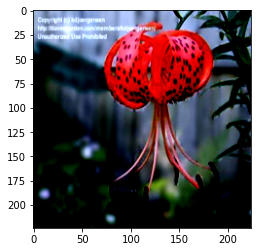

6 moon orchid


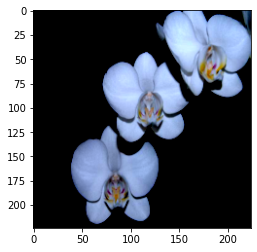

7 bird of paradise


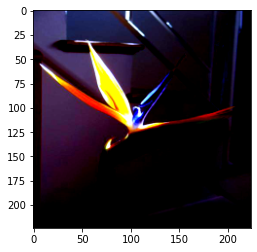

8 monkshood


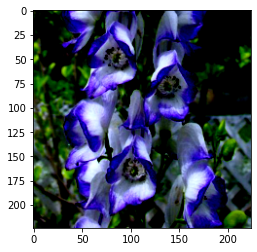

9 globe thistle


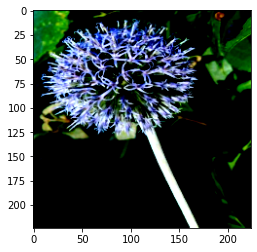

In [51]:
# Image Example with thier class names
import matplotlib.pyplot as plt
import numpy as np

for i in range(0,100,10):
  print(flower[i][1],mapping[flower[i][1]])
  plt.imshow(np.clip(flower[i][0].permute(1,2,0).detach().cpu().numpy(),0,1))
  plt.show()

In [5]:
prompt = 'a photo of a '
prompt_engineering = ' a type of flower'

text_labels = [prompt+str(mapping[i.item()])+prompt_engineering for i in labels]
text_labels[:5]

['a photo of a pink primrose a type of flower',
 'a photo of a pink primrose a type of flower',
 'a photo of a pink primrose a type of flower',
 'a photo of a pink primrose a type of flower',
 'a photo of a pink primrose a type of flower']

## Models - CLIP Text

In [6]:
version = "openai/clip-vit-base-patch32"

tokenizer = transformers.CLIPTokenizer.from_pretrained(version)

# Initializing a CLIPVisionConfig with openai/clip-vit-base-patch32 style configuration
text_config = transformers.CLIPTextConfig()

# Initializing a CLIPVisionModel (with random weights) from the openai/clip-vit-base-patch32 style configuration
text_model = transformers.CLIPTextModel(text_config).from_pretrained(version)

text_model.config

Some weights of the model checkpoint at openai/clip-vit-base-patch32 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.2.layer_norm2.bias', 'vision_model.encoder.layers.10.layer_norm2.weight', 'vision_model.encoder.layers.1.mlp.fc2.bias', 'vision_model.encoder.layers.11.self_attn.q_proj.bias', 'vision_model.encoder.layers.9.self_attn.v_proj.bias', 'vision_model.encoder.layers.1.self_attn.out_proj.weight', 'vision_model.encoder.layers.4.mlp.fc1.weight', 'vision_model.encoder.layers.11.layer_norm2.bias', 'vision_model.encoder.layers.10.layer_norm2.bias', 'vision_model.encoder.layers.9.self_attn.q_proj.bias', 'vision_model.encoder.layers.9.layer_norm2.weight', 'vision_model.encoder.layers.6.layer_norm1.weight', 'vision_model.encoder.layers.0.self_attn.v_proj.weight', 'vision_model.encoder.layers.11.mlp.fc2.weight', 'vision_model.encoder.layers.11.self_attn.out_proj.weight', 'vision_model.encoder.layers.11.self_attn.v_proj.weight', 'vision_model.encoder.layers.5.

CLIPTextConfig {
  "_name_or_path": "openai/clip-vit-base-patch32",
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "dropout": 0.0,
  "eos_token_id": 2,
  "hidden_act": "quick_gelu",
  "hidden_size": 512,
  "initializer_factor": 1.0,
  "initializer_range": 0.02,
  "intermediate_size": 2048,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 77,
  "model_type": "clip_text_model",
  "num_attention_heads": 8,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "projection_dim": 512,
  "transformers_version": "4.26.1",
  "vocab_size": 49408
}

In [7]:
text_inputs = tokenizer(text_labels,truncation=True, return_length=True,return_overflowing_tokens=False, 
          padding="max_length", return_tensors="pt")

In [9]:
# cpu / cuda

device = 'cuda' if torch.cuda.is_available() else 'cpu'
text_model.to(device)
print(device)

cuda


In [45]:
batch_inp = text_inputs['input_ids'].view(102,10,77).to(device)
batch_at = text_inputs['attention_mask'].view(102,10,77).to(device)

In [44]:
# (text_inputs['input_ids'][20] == batch_inp[2][0]).all()

tensor(True)

In [48]:
for i in tqdm(range(batch_inp.shape[0])):
  op = text_model(input_ids=batch_inp[i], attention_mask=batch_at[i])
  break

  0%|          | 0/102 [00:00<?, ?it/s]


In [51]:
op.last_hidden_state.shape

torch.Size([10, 77, 512])

In [53]:
op.pooler_output.shape

torch.Size([10, 512])

In [59]:
image_embeddings[0] @ op.pooler_output[0]

RuntimeError: ignored

# Linear Probe 



*   Image -> Clip image embeddings 
*   Clip Image embeddings -> Linear classification 

### Meta-Learning: Few Shot setting 
Based on paper
1, 2, 4, 8, 16






In [ ]:
# torch.save(image_embeddings,'flower_image_emb_1020.pt')
image_embeddings = torch.load('flower_image_emb_1020.pt')

# torch.save(labels,'flower_labels_1020.pt')
labels = torch.load('flower_labels_1020.pt')

print(image_embeddings.shape, labels.shape)

torch.unique(labels,return_counts=True)

In [ ]:
import random
import torch
import numpy as np

In [ ]:
nshot = 8
test_size = 2
n_classes = 102

# randomly choose 2 data points from data
index = np.array([np.random.choice(j,test_size,replace=False) for j in [np.arange(i,i+10) for i in range(0,1020,10)]]).flatten()

In [ ]:
'''Test set'''
test_label = labels[index].cpu().detach().numpy()
test_img_emb = image_embeddings[index].cpu().detach().numpy()
test_img_emb.shape, test_label.shape

((204, 768), (204,))

In [ ]:
index = np.array([np.random.choice(list(set(j)-set(index)),nshot,replace=False) for j in [np.arange(i,i+10) for i in range(0,1020,10)]]).flatten()

In [ ]:
'''Train set'''
train_label = labels[index].cpu().detach().numpy()
train_img_emb = image_embeddings[index].cpu().detach().numpy()
train_img_emb.shape, train_label.shape

((816, 768), (816,))

In [ ]:
from sklearn.linear_model import LogisticRegression
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)

In [ ]:
model.fit(train_img_emb, train_label)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
yhat = model.predict(test_img_emb)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy: ",accuracy_score(y_true=test_label, y_pred=yhat))
print("F1-score: ",f1_score(y_true=test_label, y_pred=yhat,average='macro'))

Accuracy:  0.9068627450980392
F1-score:  0.8996732026143793


#### Functions 

In [ ]:
def subset_data(image_embeddings,labels,nshot = 8,test_size = 2,n_classes = 102):
  # Create Test set
  # randomly choose test_size data points from data
  index = np.array([np.random.choice(j,test_size,replace=False) for j in [np.arange(i,i+10) for i in range(0,labels.shape[0],int(labels.shape[0]/n_classes))]]).flatten()
  '''Test set'''
  test_label = labels[index].cpu().detach().numpy()
  test_img_emb = image_embeddings[index].cpu().detach().numpy()
  print("Test set: ",test_img_emb.shape, test_label.shape)

  # randomly choose nshot data points from rest of the data
  index = np.array([np.random.choice(list(set(j)-set(index)),nshot,replace=False) for j in [np.arange(i,i+10) for i in range(0,labels.shape[0],int(labels.shape[0]/n_classes))]]).flatten()
  '''Train set'''
  train_label = labels[index].cpu().detach().numpy()
  train_img_emb = image_embeddings[index].cpu().detach().numpy()
  print("Train set: ",train_img_emb.shape, train_label.shape)

  return (train_img_emb, train_label, test_img_emb,test_label)
 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

def logistic(train,y_train,test,y_test):
  # define the multinomial logistic regression model
  model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
  model.fit(train, y_train)

  yhat = model.predict(test)
  print("Accuracy: ",np.round(accuracy_score(y_test,yhat),2))
  print("F1-score: ",np.round(f1_score(y_test,yhat,average='macro'),2))


In [ ]:
for nshot in [1,2,4,8]:
  print("Few shot nshot: ", nshot)
  train_img_emb, train_label, test_img_emb,test_label = subset_data(image_embeddings,labels,nshot = nshot,test_size = 2,n_classes = 102)
  logistic(train_img_emb,train_label,test_img_emb,test_label)
  print("\n")

Few shot nshot:  1
Test set:  (204, 768) (204,)
Train set:  (102, 768) (102,)
Accuracy:  0.57
F1-score:  0.53


Few shot nshot:  2
Test set:  (204, 768) (204,)
Train set:  (204, 768) (204,)
Accuracy:  0.74
F1-score:  0.71


Few shot nshot:  4
Test set:  (204, 768) (204,)
Train set:  (408, 768) (408,)
Accuracy:  0.82
F1-score:  0.79


Few shot nshot:  8
Test set:  (204, 768) (204,)
Train set:  (816, 768) (816,)
Accuracy:  0.91
F1-score:  0.9




In [ ]:
for nshot in [1,2,4,8]:
  print("Few shot nshot: ", nshot)
  train_img_emb, train_label, test_img_emb,test_label = subset_data(image_embeddings,labels,nshot = nshot,test_size = 2,n_classes = 102)
  logistic(train_img_emb,train_label,test_img_emb,test_label)
  print("\n")

Few shot nshot:  1
Test set:  (204, 768) (204,)
Train set:  (102, 768) (102,)
Accuracy:  0.54
F1-score:  0.5


Few shot nshot:  2
Test set:  (204, 768) (204,)
Train set:  (204, 768) (204,)
Accuracy:  0.77
F1-score:  0.75


Few shot nshot:  4
Test set:  (204, 768) (204,)
Train set:  (408, 768) (408,)
Accuracy:  0.87
F1-score:  0.86


Few shot nshot:  8
Test set:  (204, 768) (204,)
Train set:  (816, 768) (816,)
Accuracy:  0.89
F1-score:  0.89




# Zero Shot

In [ ]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

# Dataset Food101

In [ ]:
'''Imports'''

import torch
import transformers

import torchvision
import torchvision.transforms as t
from torch.utils.data import DataLoader

# others
from tqdm import tqdm

In [ ]:
# get image configs for CLIP
deets = transformers.CLIPImageProcessor()

_transforms = t.Compose([
                          t.Resize((deets.crop_size['height'],deets.crop_size['width'])),   #(224,224)
                          t.ToTensor(), 
                          t.Normalize(mean=deets.image_mean, std=deets.image_mean),
                          ])

flower = torchvision.datasets.Food101(root='/content/',transform=_transforms,download=True,split='train')
print(flower)

train_dataloader = DataLoader(flower, batch_size=750, shuffle=False)

Dataset Food101
    Number of datapoints: 75750
    Root location: /content/
    split=train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.48145466, 0.4578275, 0.40821073])
           )


In [ ]:
flower[0]

(tensor([[[ 1.0119,  1.0037,  1.0200,  ..., -0.2262, -0.2832, -0.2506],
          [ 1.0200,  1.0119,  1.0200,  ..., -0.1855, -0.2018, -0.2099],
          [ 1.0282,  1.0200,  1.0282,  ..., -0.1773, -0.1773, -0.2018],
          ...,
          [ 0.2625,  0.2462,  0.2381,  ...,  0.1403,  0.1403,  0.1566],
          [ 0.2381,  0.2218,  0.2055,  ...,  0.2055,  0.1974,  0.2218],
          [ 0.2136,  0.1811,  0.1811,  ...,  0.2381,  0.2299,  0.2381]],
 
         [[ 1.0814,  1.0729,  1.0900,  ..., -0.6831, -0.7516, -0.7259],
          [ 1.0900,  1.0814,  1.0900,  ..., -0.6402, -0.6745, -0.6916],
          [ 1.0986,  1.0900,  1.0986,  ..., -0.6402, -0.6574, -0.6916],
          ...,
          [-0.3404, -0.3661, -0.3661,  ...,  0.0793,  0.1050,  0.1478],
          [-0.3490, -0.3747, -0.3833,  ...,  0.1478,  0.1735,  0.2163],
          [-0.3747, -0.4090, -0.4090,  ...,  0.1906,  0.2078,  0.2334]],
 
         [[ 1.3440,  1.3344,  1.3536,  ..., -0.7790, -0.8943, -0.8943],
          [ 1.3536,  1.3440,

In [ ]:
labels=[]
for idx, (img,label) in enumerate(tqdm(train_dataloader)):
    # output = model.forward(img.to(device),return_dict=False)
    # image_embeddings.append(output[1])
    print(img.shape,label.shape)
    print(torch.unique(label,return_counts=True))

    # labels.append(label)
    break

  0%|          | 0/101 [00:05<?, ?it/s]

torch.Size([750, 3, 224, 224]) torch.Size([750])
(tensor([23]), tensor([750]))


In [ ]:
torch.unique(torch.stack(labels).flatten(),return_counts=True)

(tensor([ 0,  1,  2,  4,  5,  6,  7,  8, 11, 13, 14, 18, 20, 21, 23, 25, 26, 27,
         30, 33, 35, 36, 38, 39, 45, 46, 47, 48, 50, 54, 57, 59, 62, 64, 65, 68,
         70, 71, 72, 73, 74, 77, 78, 80, 81, 83, 84, 85, 86, 87, 90, 92, 93, 96,
         98]),
 tensor([750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750,
         750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750,
         750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 716, 750,
         750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750]))